# Flu Trends - Exploratory Data Analysis

Explore the dataset `flu_trends.csv` to uncover trends, seasonality and other hidden patterns within the data.

# Setup Notebook

## Import

In [1]:
# Import Standard Libraries
import numpy as np
import pandas as pd
from pathlib import Path
import os
from sklearn.linear_model import LinearRegression

# Import Package Modules
from src.general_utils.general_utils import (
    read_configuration, 
    read_data_from_config
)
from src.exploratory_data_analysis.exploratory_data_analysis_utils import (
    set_plot_characteristics,
    plot_time_series,
    plot_predictions_vs_time_series
)

## Define Configuration

In [2]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'flu_trends_config.yaml')

# Extract configuration variables
dataset_config = config['dataset_config']
plot_characteristics = config['plot_characteristics']

[06/17/2024 21:52:07 - general_utils] INFO - read_configuration - Start
[06/17/2024 21:52:07 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml
[06/17/2024 21:52:07 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml read successfully
[06/17/2024 21:52:07 - general_utils] INFO - read_configuration - End


## Setup Plot Characteristics

In [3]:
set_plot_characteristics(plot_characteristics)

[06/17/2024 21:52:07 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Start
[06/17/2024 21:52:07 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Creating theme parameters
[06/17/2024 21:52:07 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - End


# Read Data

In [4]:
# Read dataset
dataset = read_data_from_config(dataset_config)

[06/17/2024 21:52:07 - general_utils] INFO - read_data_from_config - Start
[06/17/2024 21:52:07 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/17/2024 21:52:07 - general_utils] INFO - build_path_from_list - Start
[06/17/2024 21:52:07 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/17/2024 21:52:07 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/17/2024 21:52:07 - general_utils] INFO - build_path_from_list - End
[06/17/2024 21:52:07 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/flu_trends.csv
[06/17/2024 21:52:07 - general_utils] INFO - read_data_from_config - Reading data with date columns
[06/17/2024 21:52:07 - general_utils] INFO - read_data_from_config - Successfully read data with 366 rows and 131 columns
[06/17/2024 21:52:07 - general_utils] INFO - read_data_from_config - End


# Exploratory Data Analysis

## Plot Time Series

[06/17/2024 21:52:07 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/17/2024 21:52:07 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/17/2024 21:52:08 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot connfigurations
[06/17/2024 21:52:08 - exploratory_data_analysis_utils] INFO - plot_time_series - Calling the plt.show()


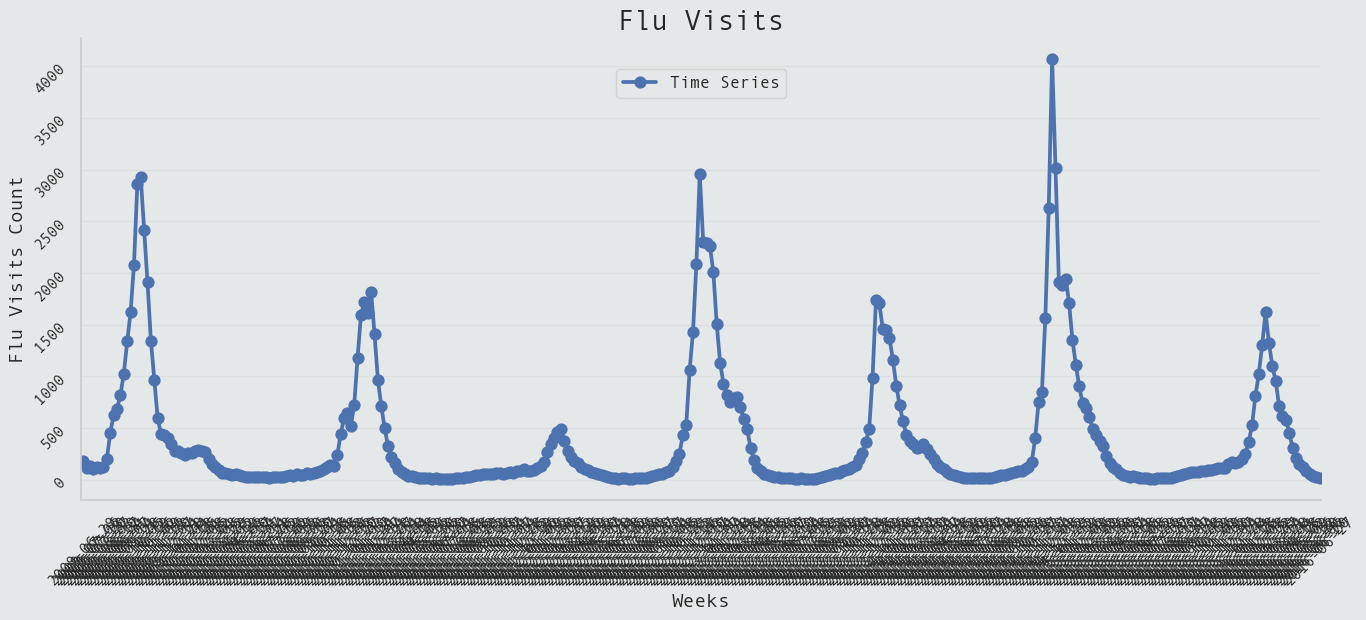

[06/17/2024 21:52:10 - exploratory_data_analysis_utils] INFO - plot_time_series - End


<Figure size 1600x600 with 0 Axes>

In [5]:
ax = plot_time_series(dataset, 
                      columns=('Week', 'FluVisits'), 
                      title='Flu Visits', 
                      labels=('Weeks', 'Flu Visits Count', 'Time Series'), 
                      to_plot=True)

## Moving Average

In [9]:
dataset_copy = dataset.copy()

dataset_copy = dataset_copy.set_index('Week')

moving_average = dataset_copy.rolling(
    window=365, # Window size
    center=True, # Place average at the center of the window
    min_periods=183 # Starting and ending window size
).mean()

# Data Preparation

## Time-step Feature

In [6]:
# Add 'Time' feature
dataset['Time'] = np.arange(len(dataset))

# Model Training

## Linear Regression with Time-step Feature

[06/17/2024 21:52:10 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Start
[06/17/2024 21:52:10 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Plot tim series
[06/17/2024 21:52:10 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/17/2024 21:52:10 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/17/2024 21:52:11 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot connfigurations
[06/17/2024 21:52:11 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[06/17/2024 21:52:11 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Plot predicted values


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x129e13da0>.

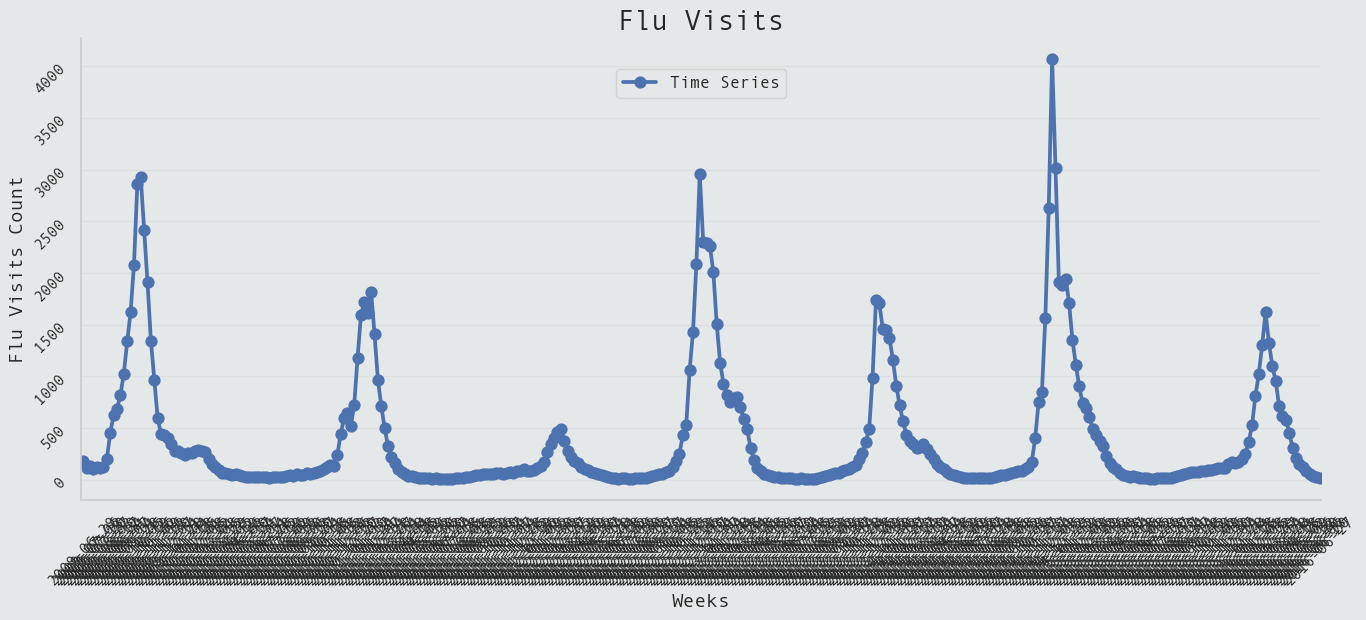

In [7]:
# Define x, y
x = dataset.loc[:, ['Time']]
y = dataset.loc[:, ['FluVisits']]

# Instance model
model_lr_time_step = LinearRegression()

# Fit model
model_lr_time_step.fit(x, y)

# Produce prediction
predictions_lr_time_step = model_lr_time_step.predict(x)

# Show predictions
plot_predictions_vs_time_series(time_series=dataset,
                                predictions=predictions_lr_time_step.reshape(-1),
                                columns=('Week', 'FluVisits'),
                                title='Flu Visits',
                                labels=('Weeks', 'Flu Visits Count'))